In [53]:
from flytekit.sdk.tasks import (
    python_task,
    inputs,
    outputs,
)
from flytekit.sdk.types import Types
from flytekit.common import utils

from demo_metrics.tasks.confusion_matrix import _plot_confusion_matrix as pm, _sample_train as st

In [58]:
import numpy as np

@inputs(y_true=[Types.Integer], y_pred=[Types.Integer], title=Types.String, normalize=Types.Boolean, classes=[Types.String])
@outputs(matrix=[[Types.Integer]], visual=Types.Blob)
@python_task
def confusion_matrix(wf_params, y_true, y_pred, title, normalize, classes, matrix, visual):
    with utils.AutoDeletingTempDir('test') as tmpdir:
        f_path = tmpdir.get_named_tempfile("visual")
        cm = pm(np.asarray(y_true), np.asarray(y_pred), classes=np.asarray(classes), title=title, normalize=normalize, to_file_path=f_path)
        visual.set(f_path)
        m = []
        for i in range(cm.shape[0]):
            m.append([])
            for j in range(cm.shape[1]):
              m[i].append(j)
        matrix.set(m)

In [59]:
y_test, y_pred, class_names = st()
print(type(class_names))
y_test.tolist()
class_names.tolist()

<class 'numpy.ndarray'>


['setosa', 'versicolor', 'virginica']

Confusion matrix, without normalization


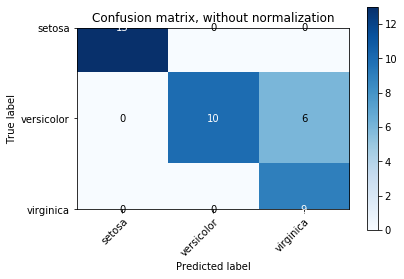

In [60]:
cm = confusion_matrix.unit_test(y_true=y_test.tolist(), y_pred=y_pred.tolist(), title='Confusion matrix, without normalization', normalize=False, classes=class_names.tolist())

In [57]:
print(cm)

{'matrix': [[0.0, 1.0, 2.0], [0.0, 1.0, 2.0], [0.0, 1.0, 2.0]], 'visual': metadata {
  type {
  }
}
uri: "/var/folders/2b/wytvyh952jz8c17mp6yvh8nc0000gq/T/test_8wu_53cn/visual"
}


In [42]:
open("/var/folders/2b/wytvyh952jz8c17mp6yvh8nc0000gq/T/test_inbo8f8i/visual")

FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/2b/wytvyh952jz8c17mp6yvh8nc0000gq/T/test_inbo8f8i/visual'